# Multiple linear regression

In [5]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt 

## 1.Dataset

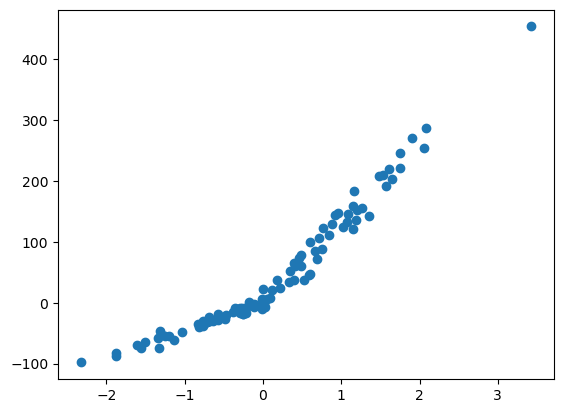

In [90]:
(x,y) = make_regression(n_samples=100, n_features=1, noise=10 )
y = y + abs(y/2)
plt.scatter(x[:,0],y)

In [92]:
x[:5]

array([[-1.50505758],
       [-1.3114326 ],
       [ 1.5292419 ],
       [ 0.39940512],
       [-0.67936673]])

In [94]:
print(x.shape)
y = y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)
(100, 1)


In [96]:
# create matrix X

X = np.hstack(((x**2), x, np.ones(x.shape)))
X[:5]

array([[ 2.26519831, -1.50505758,  1.        ],
       [ 1.71985546, -1.3114326 ,  1.        ],
       [ 2.33858079,  1.5292419 ,  1.        ],
       [ 0.15952445,  0.39940512,  1.        ],
       [ 0.46153916, -0.67936673,  1.        ]])

In [98]:
# create theta0 
theta = np.random.randn(3,1)
theta

array([[ 1.48285049],
       [ 0.15429718],
       [-0.89872112]])

## 2. Model

In [108]:
# create function model
def model(X, theta):
    return X.dot(theta)

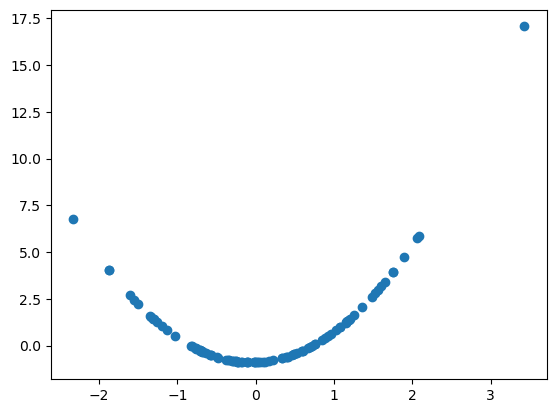

In [110]:
plt.scatter(x[:,0], model(X, theta))

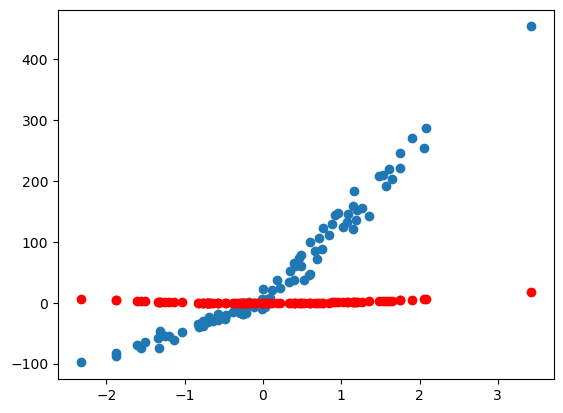

In [112]:
# test
model(X,theta)
plt.scatter(x,y)
plt.scatter(x[:,0], model(X,theta), c='r')

## 3. Cost function

In [116]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [131]:
cost_function(X, y, theta)

5890.251938441839

## 4. Gradient and gradient descent

In [129]:
def grad(X, y, theta):
    m =  len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [133]:
def grad_descent( X, y, theta, learning_rate, n_iterations):
    history_cost = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        history_cost[i] = cost_function(X, y, theta)
    return theta, history_cost

## 5. Model training

In [220]:
theta_final, history_cost = grad_descent(X, y, theta, 0.01, 1000)

In [222]:
theta_final

array([[16.31399606],
       [86.57702616],
       [18.51216622]])

In [224]:
cost_function(X, y, theta_final)

121.43990384833391

In [228]:
predictions = model(X, theta_final)

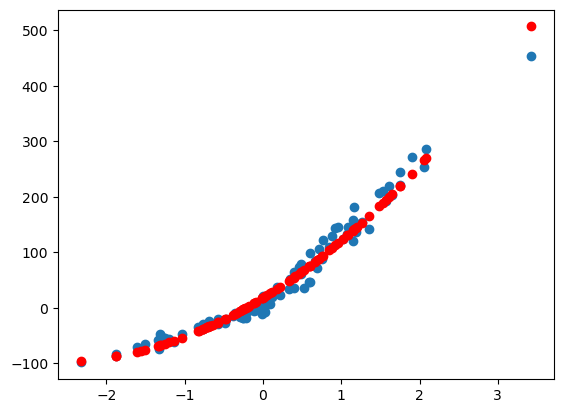

In [230]:
plt.scatter(x,y)
plt.scatter(x[:,0], predictions, c='r')

## 6. Cost history

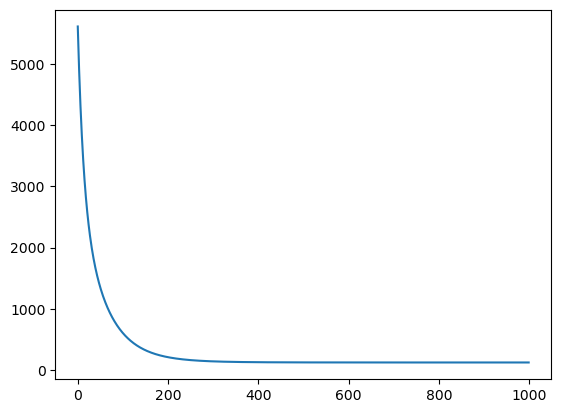

In [232]:
plt.plot(range(1000), history_cost)

## 7.Determination coefficient

In [236]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [238]:
coef_determination(y, predictions)

0.9761196210575744